In [1]:
suppressMessages(library(ggplot2))
suppressMessages(library(ArchR))
suppressMessages(library(Seurat))
suppressMessages(library(Signac))

In [2]:
set.seed(42)
addArchRThreads(threads = 64)

Setting default number of Parallel threads to 64.



### 乳腺上皮细胞 marker genes

In [3]:
proj <- loadArchRProject("./ArchRProject_epithelial", showLogo = FALSE)

Successfully loaded ArchRProject!



In [7]:
proj <- addImputeWeights(proj)

ArchR logging to : ArchRLogs/ArchR-addImputeWeights-4ed2a3aa3757-Date-2025-03-07_Time-09-10-02.961015.log
If there is an issue, please report to github with logFile!

2025-03-07 09:10:03.00641 : Computing Impute Weights Using Magic (Cell 2018), 0 mins elapsed.

Filtering 1 dims correlated > 0.75 to log10(depth + 1)



In [4]:
markersGS <- readRDS(file = "./ArchRProject_epithelial/markersGS.rds")

ArchR logging to : ArchRLogs/ArchR-plotMarkerHeatmap-2bd84f228ea457-Date-2025-03-04_Time-05-44-33.604421.log
If there is an issue, please report to github with logFile!

Printing Top Marker Genes:

C1:

	MIR4689, LINC01672, TRNP1, CD164L2, POU3F1, PODN, FAM151A, KANK4, WLS, RPE65, LRRC8C, HFM1, AMY2A, LINC01145, LCE1C

C2:

	TP73, DHRS3, MIR3972, IFFO2, LINC01141, IFNLR1, RPS6KA1, MIR1976, TINAGL1, GJB5, GJB4, SSBP3, NFIA-AS2, LPAR3, CLCA2

C3:

	LINC01360, S100A7L2, FCRL4, MRLN, NKX6-2, VENTX, OR8J3, OR4D11, DEFB131B, PDZD3, CRTAM, OR6X1, LINC02470, TAS2R19, TAS2R31

C4:

	FAM167B, MARCKSL1, HPCA, RNF19B, TFAP2E, MYCL, RNU5F-1, TEX38, EFCAB14-AS1, CYP4Z1, FOXE3, FOXD2, SLC5A9, FOXD3-AS1, MIR6068

C5:

	CELA3A, LINC01756, HMGB4, INSL5, GBP3, LY9, SLC30A10, CHRM3, TUBAL3, FAM25G, ADAMTS14, MIR4295, LINC01561, ADAM12, MIR675

C6:

	C1orf158, PLA2G2D, GBP2, OR2T27, PTGDR2, KRTAP5-10, RGCC, LINC00379, SLC39A2, RLBP1, ALDH1A3, SNORA30, KRTAP4-1, KRTAP9-1, ZNF562

C7:

	HTR1D, GJA5, ITLN1, M

[1] "MKI67" "ESR1"  "PGR"   "ERBB2" "KRT8"  "KRT18" "KRT19"


Preparing Main Heatmap..

ArchR logging successful to : ArchRLogs/ArchR-plotMarkerHeatmap-2bd84f228ea457-Date-2025-03-04_Time-05-44-33.604421.log



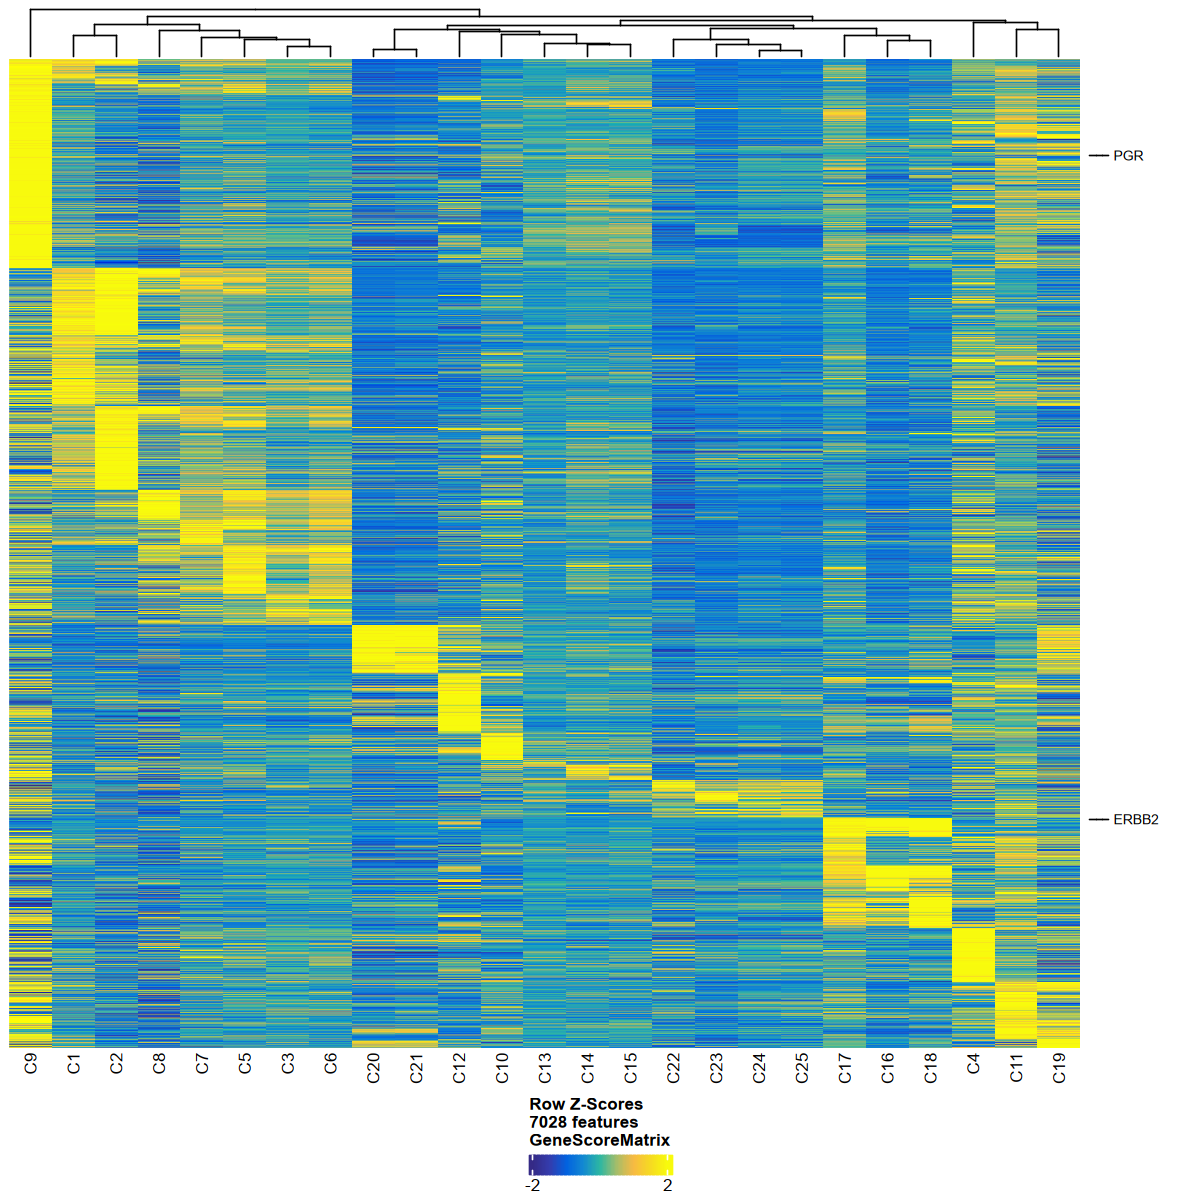

In [5]:
# Heatmap
## marker genes, 根据05_01_annotation中的显著表达来确定绘图的marker genes
markerGenes <- c(
    "MKI67", "ESR1", "PGR", "ERBB2",  # 乳腺癌亚型marker genes，Ki67, ER, PR, HER2
    "KRT8", "KRT18", "KRT19"  #正常乳腺上皮细胞marker genes
)

heatmapGS <- plotMarkerHeatmap(
  seMarker = markersGS, 
  cutOff = "FDR <= 0.05 & Log2FC >= 1.25", 
  labelMarkers = markerGenes
)

options(repr.plot.height = 10, repr.plot.width = 10)
ComplexHeatmap::draw(heatmapGS, 
                     heatmap_legend_side = "bot", 
                     annotation_legend_side = "bot")

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-4ed2a3af839a4-Date-2025-03-07_Time-09-11-32.872475.log
If there is an issue, please report to github with logFile!



Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-4ed2a3af839a4-Date-2025-03-07_Time-09-11-32.872475.log



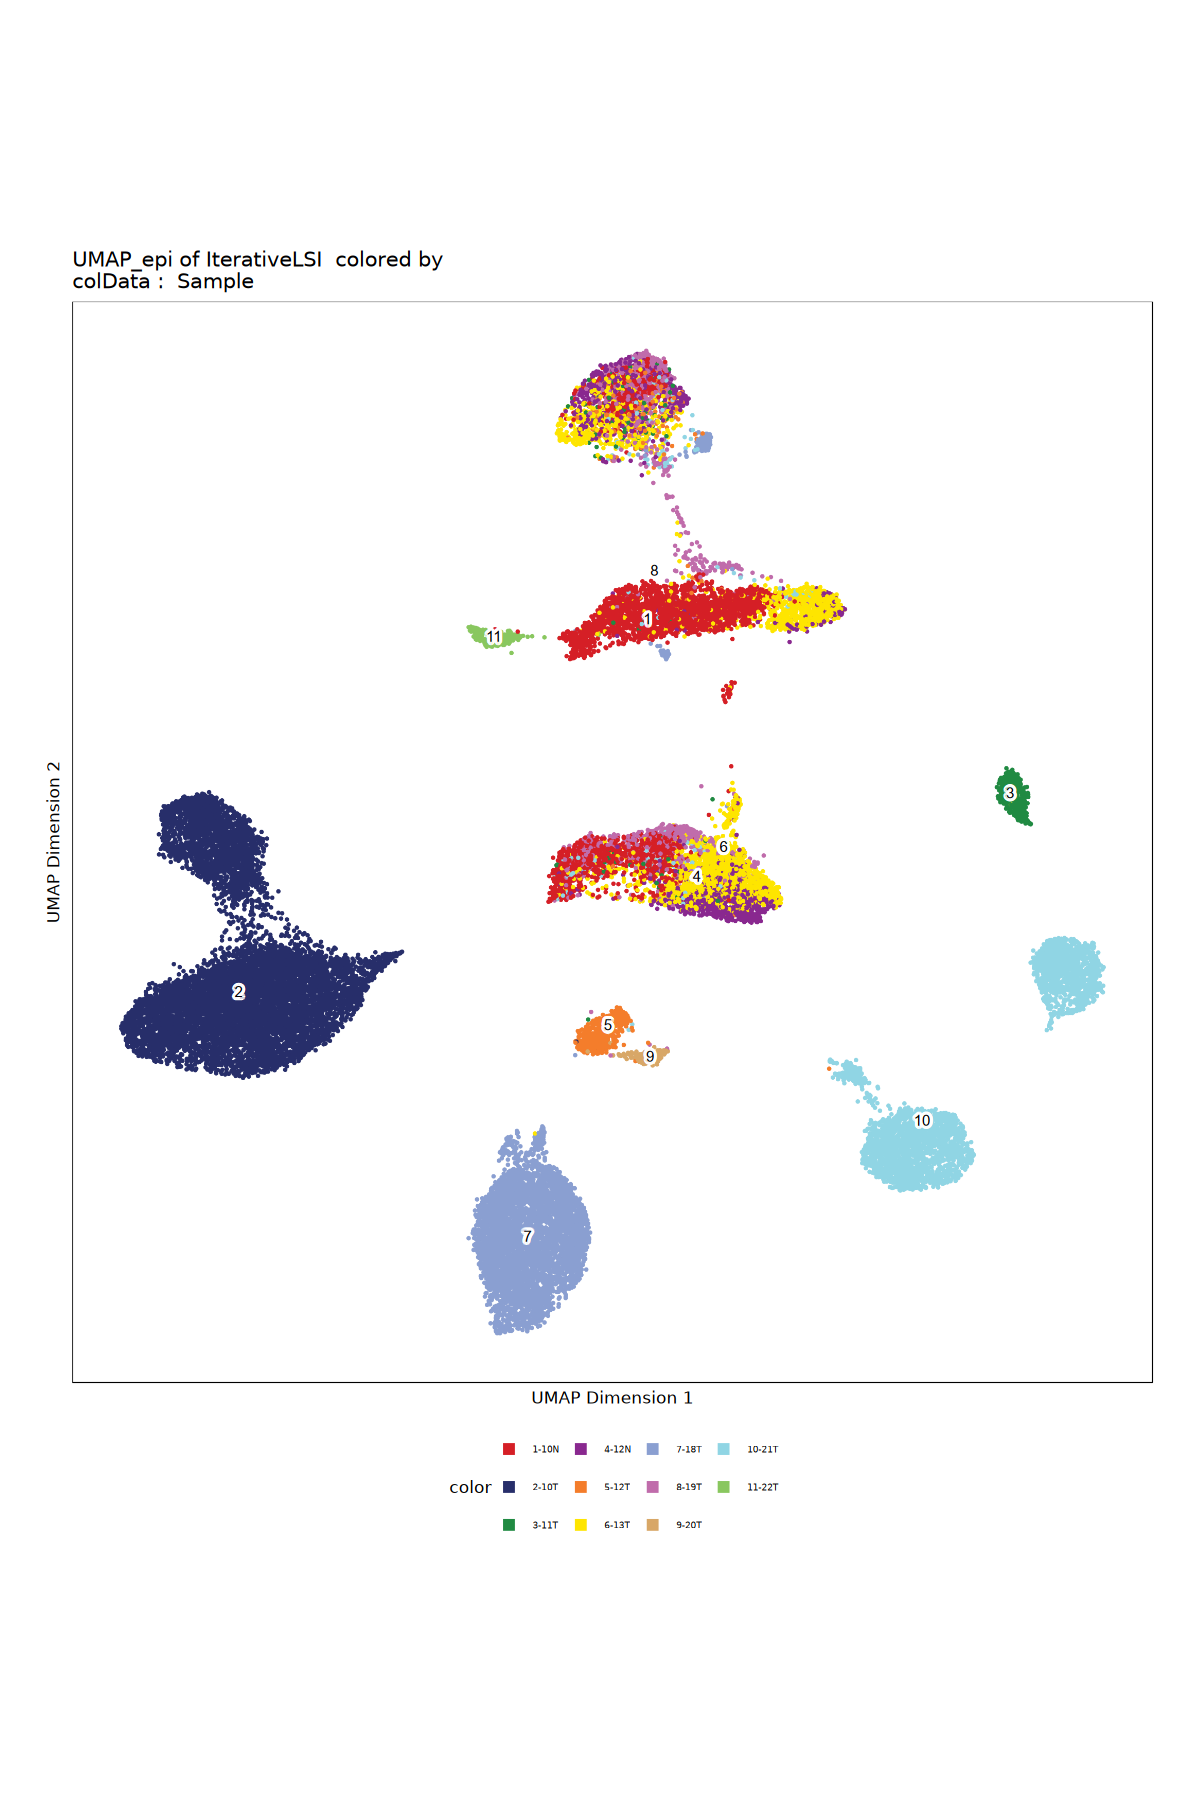

In [9]:
p2 <- plotEmbedding(
    ArchRProj = proj, 
    colorBy = "cellColData", 
    name = "Sample", 
    embedding = "UMAP_epi"
    )
p2

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-4ed2a5494528a-Date-2025-03-07_Time-09-08-07.195457.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = GeneScoreMatrix

Getting Matrix Values...

2025-03-07 09:08:38.622796 : 



Plotting Embedding

1 
2 
3 
4 
5 
6 
7 
8 
9 
10 
11 
12 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-4ed2a5494528a-Date-2025-03-07_Time-09-08-07.195457.log

Warning message:
“The `<scale>` argument of `guides()` cannot be `FALSE`. Use "none" instead as
of ggplot2 3.3.4.”


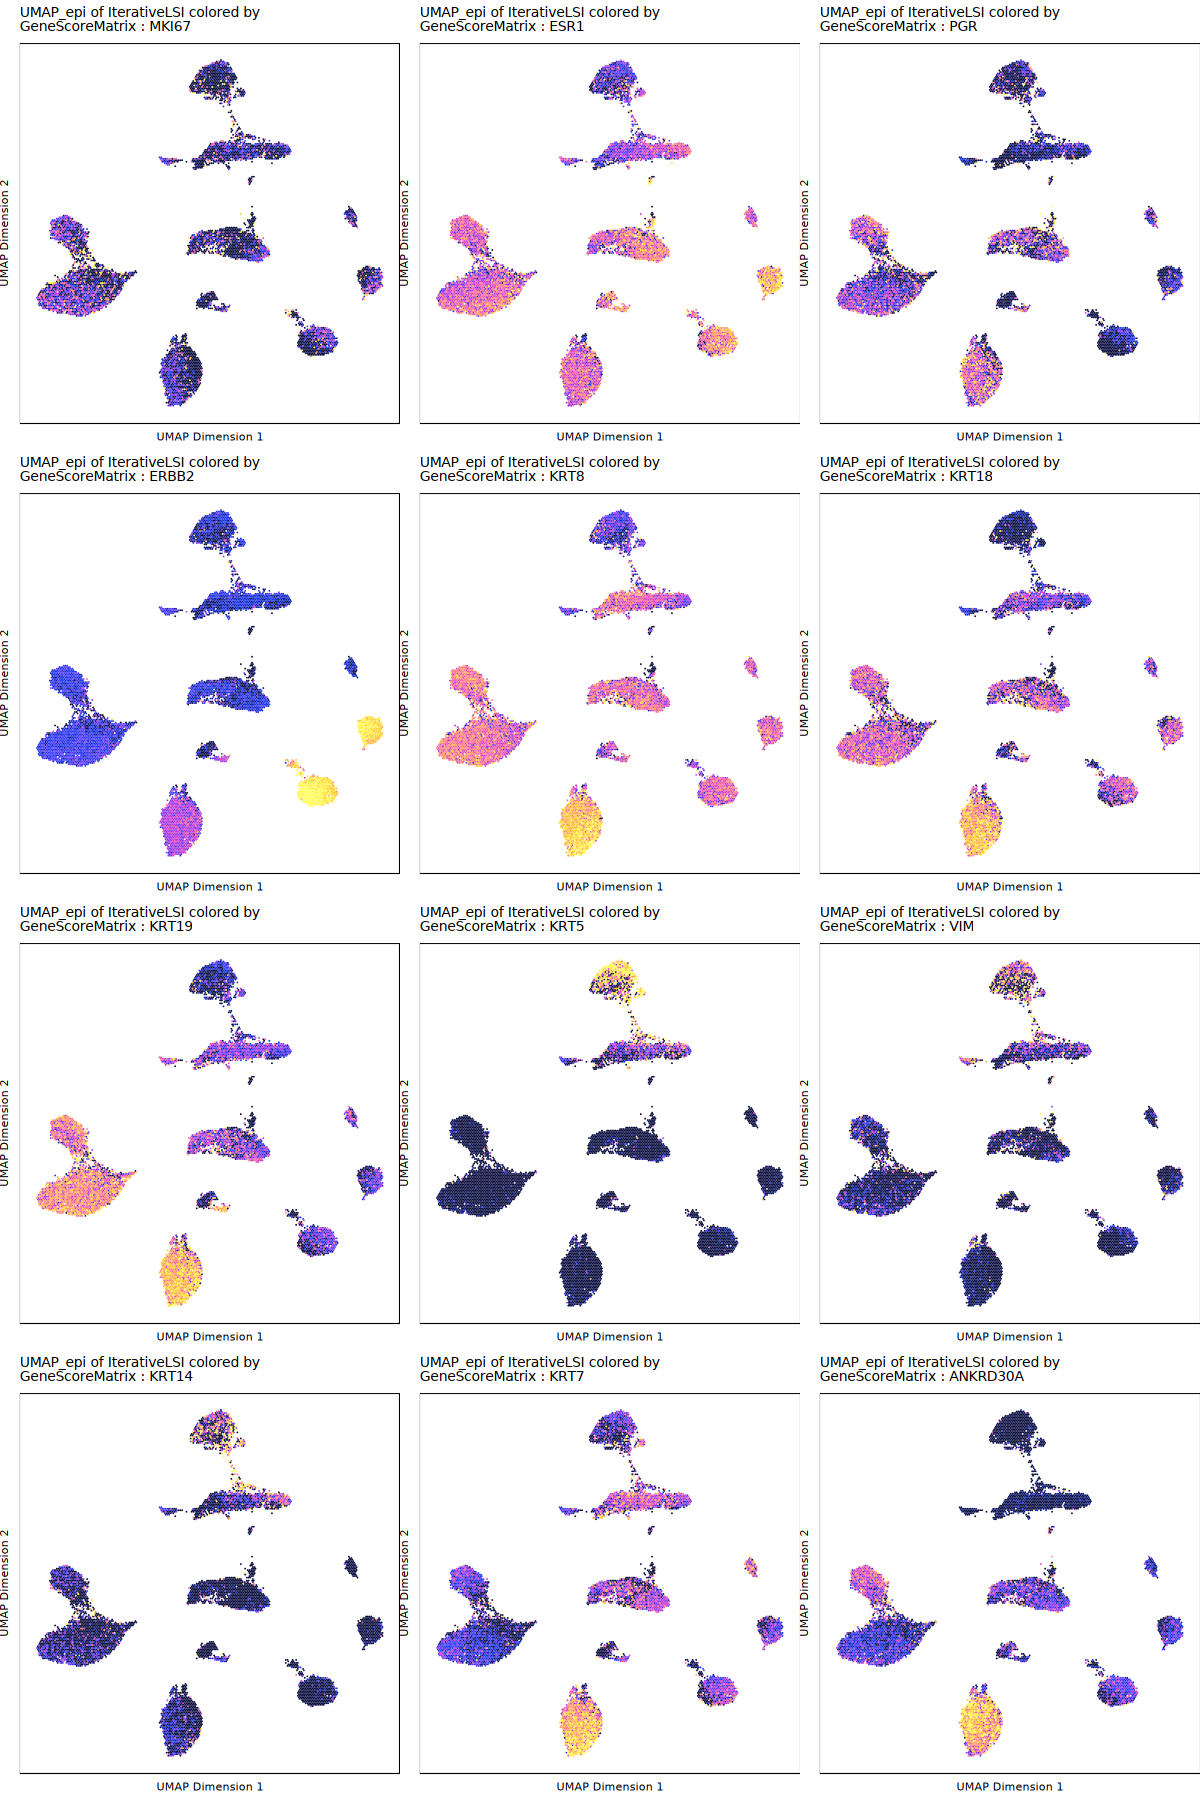

In [6]:
markerGenes <- c(
    "MKI67", "ESR1", "PGR", "ERBB2",  # 乳腺上皮细胞亚型marker genes
    "KRT8", "KRT18", "KRT19" , #正常乳腺上皮细胞marker genes(KRT18中一部分KRT7高表达，一部分低表达)
    "KRT5", "VIM", "KRT14", # 基底细胞
    "KRT7", "ANKRD30A"
)
# 基因得分UMAP可视化
p <- plotEmbedding(
    ArchRProj = proj, 
    colorBy = "GeneScoreMatrix", 
    name = markerGenes, 
    embedding = "UMAP_epi",
    quantCut = c(0.01, 0.95),
    imputeWeights = NULL
)
options(repr.plot.height = 15, repr.plot.width = 10)
p2 <- lapply(p, function(x){
    x + guides(color = FALSE, fill = FALSE) + 
    theme_ArchR(baseSize = 6.5) +
    theme(plot.margin = unit(c(0, 0, 0, 0), "cm")) +
    theme(
        axis.text.x=element_blank(), 
        axis.ticks.x=element_blank(), 
        axis.text.y=element_blank(), 
        axis.ticks.y=element_blank()
    )
})
do.call(cowplot::plot_grid, c(list(ncol = 3),p2))

Getting ImputeWeights

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-4ed2a4100a642-Date-2025-03-07_Time-09-13-00.83289.log
If there is an issue, please report to github with logFile!



Getting UMAP Embedding

ColorBy = GeneScoreMatrix

Getting Matrix Values...

2025-03-07 09:13:01.058822 : 



Imputing Matrix

Using weights on disk

Using weights on disk

Plotting Embedding

1 
2 
3 
4 
5 
6 
7 
8 
9 
10 
11 
12 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-4ed2a4100a642-Date-2025-03-07_Time-09-13-00.83289.log



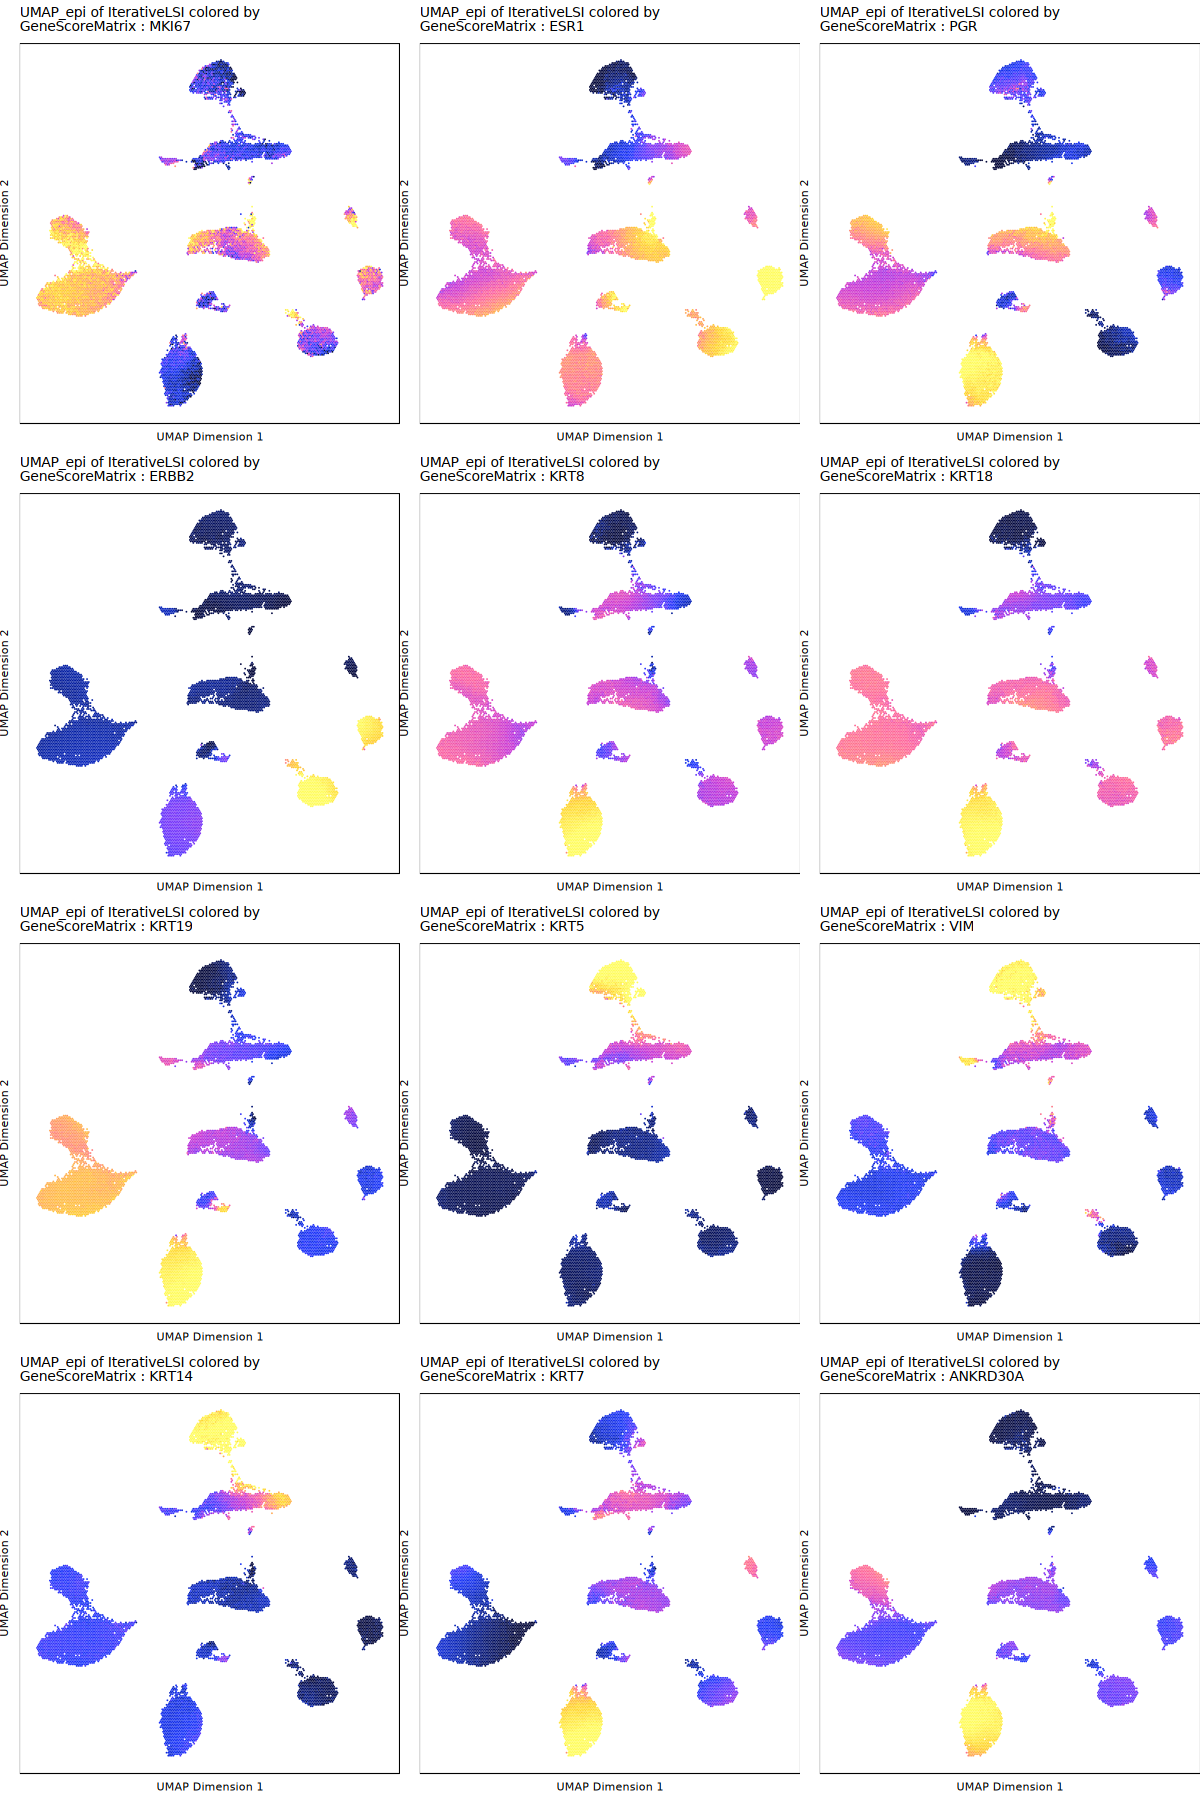

In [11]:
# 基因得分UMAP可视化
p <- plotEmbedding(
    ArchRProj = proj, 
    colorBy = "GeneScoreMatrix", 
    name = markerGenes, 
    embedding = "UMAP_epi",
    quantCut = c(0.01, 0.95),
    imputeWeights = getImputeWeights(proj)
)
options(repr.plot.height = 15, repr.plot.width = 10)
p2 <- lapply(p, function(x){
    x + guides(color = FALSE, fill = FALSE) + 
    theme_ArchR(baseSize = 6.5) +
    theme(plot.margin = unit(c(0, 0, 0, 0), "cm")) +
    theme(
        axis.text.x=element_blank(), 
        axis.ticks.x=element_blank(), 
        axis.text.y=element_blank(), 
        axis.ticks.y=element_blank()
    )
})
do.call(cowplot::plot_grid, c(list(ncol = 3),p2))